### This is find out clusters in superhero data if there are any

In [275]:
import pandas as pd
from sklearn import preprocessing 
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
superheros_data=pd.read_csv('heroes_information.csv')

### fill missing values

In [ ]:
superheros_data['Race'] = superheros_data['Race'].replace('-', np.nan, regex=True)
superheros_data['Race']=superheros_data['Race'].fillna(0)
superheros_data['Race']=superheros_data['Race'].replace(0,'NA')
superheros_data['Publisher']=superheros_data['Publisher'].fillna(0)
superheros_data['Publisher']=superheros_data['Publisher'].replace(0,'NA')


### Convert Catagorical Variables to Numbers using LableEncoder

In [ ]:
le = preprocessing.LabelEncoder()
superheros_data['Gender']=le.fit_transform(superheros_data['Gender'])
superheros_data['Eye color']=le.fit_transform(superheros_data['Eye color'])
superheros_data['Hair color']=le.fit_transform(superheros_data['Hair color'])
superheros_data['Race']=le.fit_transform(superheros_data['Race'])
superheros_data['Publisher']=le.fit_transform(superheros_data['Publisher'])
superheros_data['Alignment']=le.fit_transform(superheros_data['Alignment'])

### Save the formatted data to  CSV File

In [117]:
superheros_data.to_csv('heros_info_formatted.csv')

### read updated data from csv

In [118]:
superheros_data_formatted=pd.read_csv('heros_info_formatted.csv')
X=superheros_data_formatted.copy()
X.drop('Gender',axis=1,inplace=True)
y=superheros_data_formatted["Gender"]

## Distritubions of different features in dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226B3DB2A58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000226B420BA58>]], dtype=object)

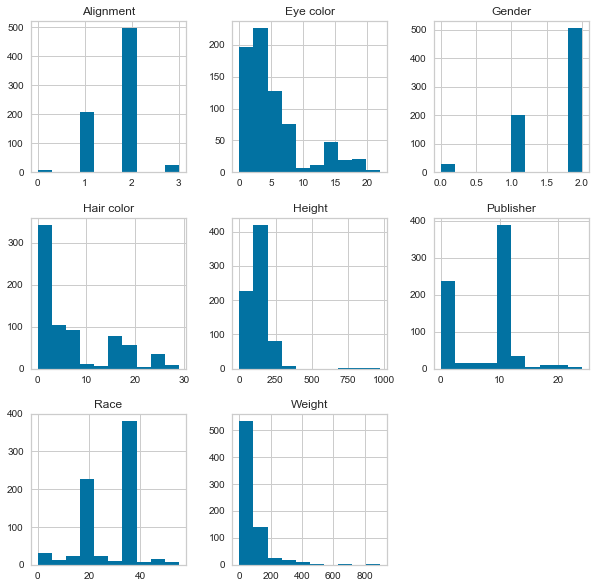

In [281]:
%matplotlib inline
superheros_data_formatted.hist(figsize=(10,10))

### Check Correleation between different feattures in dataset

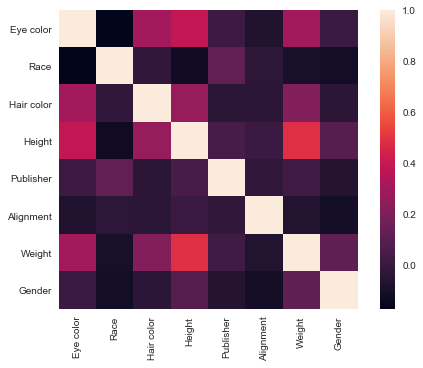

In [280]:
import seaborn as sns
sns.heatmap(pd.DataFrame(superheros_data_formatted).corr(),square=True)

As K Means is suseptable to outliers we scale the features using sklearn standard scaler

In [277]:
ss = StandardScaler()
ss.fit_transform(superheros_data_formatted)

array([[ 2.78480678, -0.77875601,  1.056826  , ...,  0.5064669 ,
         3.64070442,  0.63442197],
       [-0.41777556, -0.32176296,  1.056826  , ...,  0.5064669 ,
        -0.10665662,  0.63442197],
       [-0.41777556,  1.8718037 ,  1.056826  , ...,  0.5064669 ,
         0.14250302,  0.63442197],
       ..., 
       [ 0.18270863,  2.23739815,  2.46697525, ...,  0.5064669 ,
        -0.58504314,  0.63442197],
       [-0.41777556, -0.77875601, -0.60971402, ...,  0.5064669 ,
        -0.18638771, -1.17048394],
       [ 1.7839998 ,  0.77502037, -0.09693248, ..., -1.38057221,
         0.05280555,  0.63442197]])

We use the elbow method to find out the optimal number of clusters required as shown below

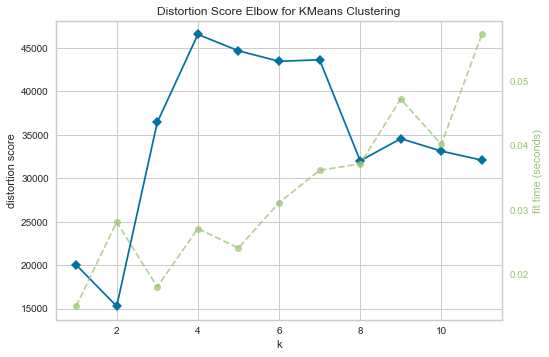

In [278]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(kmeans_2, k=(1,12))

visualizer.fit(superheros_data_formatted) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

We use the kmeans alogrithm to find out the clusters

In [295]:
from sklearn.cluster import KMeans
from sklearn  import preprocessing
from sklearn  import metrics
kmeans_2=KMeans(n_clusters=8)
superheros_data_formatted.fillna(0,inplace=True)

predictions_train=kmeans_2.fit(superheros_data_formatted)
predictions=kmeans_2.predict(superheros_data_formatted)

Below is the scatter plot which shows the required features

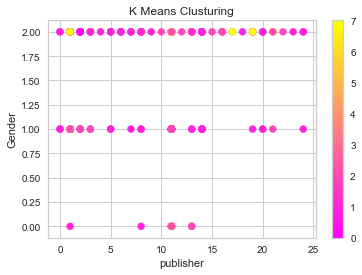

In [294]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(superheros_data_formatted['Publisher'],superheros_data_formatted['Gender'],
                     c=predictions, cmap="spring",s=50)
ax.set_title('K Means Clusturing')
ax.set_xlabel('publisher')
ax.set_ylabel('Gender')
plt.colorbar(scatter)

As we can see from the above figure there is no clear clusters no matter what we try.